In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation
0,81f884c64a7,1,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican
1,30c2723a188,0,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat
2,6936b216e5d,0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat
3,b5cd9195738,1,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none
4,84f8dac7737,0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican


In [2]:
label = train.label.copy()
data = train.drop('label', axis=1)

In [3]:
data.head()

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation
0,81f884c64a7,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican
1,30c2723a188,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat
2,6936b216e5d,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat
3,b5cd9195738,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none
4,84f8dac7737,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican


In [4]:
label.head()

0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(data, label)
X_resampled, y_resampled = rus.fit_resample(data, label)

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data, label)

In [7]:
X_resampled['label'] = y_resampled
balanced_df = X_resampled.copy()
balanced_df.head()

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation,label
0,81f884c64a7,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican,1
1,30c2723a188,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat,0
2,6936b216e5d,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat,0
3,b5cd9195738,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none,1
4,84f8dac7737,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican,0


In [8]:
balanced_df.label.value_counts()

0    5795
1    5795
Name: label, dtype: int64

In [9]:
balanced_df.to_csv('oversampled_balanced_train.csv')

In [10]:
from collections import Counter
def get_topics(x):
    return x.split(',')
topics = train.subject.apply(get_topics).to_list()
topics = [item for sublist in topics for item in sublist]
topics = Counter(topics)
n = 50
top_topics = topics.most_common(n)
top_keys = [key for key,count in top_topics]
top_values = [count for key,count in top_topics]
print(top_topics)

[('economy', 997), ('health-care', 991), ('taxes', 857), ('federal-budget', 646), ('education', 638), ('jobs', 632), ('state-budget', 612), ('candidates-biography', 572), ('elections', 536), ('immigration', 456), ('foreign-policy', 410), ('crime', 384), ('history', 352), ('energy', 328), ('legal-issues', 304), ('environment', 299), ('guns', 283), ('military', 266), ('job-accomplishments', 261), ('workers', 247), ('terrorism', 246), ('abortion', 230), ('message-machine-2012', 228), ('transportation', 228), ('criminal-justice', 223), ('state-finances', 215), ('states', 194), ('public-health', 190), ('deficit', 186), ('pundits', 183), ('congress', 180), ('women', 177), ('message-machine', 171), ('corrections-and-updates', 170), ('children', 168), ('campaign-finance', 165), ('voting-record', 162), ('medicare', 161), ('stimulus', 158), ('labor', 155), ('income', 150), ('poverty', 150), ('government-regulation', 147), ('ethics', 140), ('religion', 133), ('public-safety', 123), ('polls', 119)

In [11]:
topic_cols = top_keys + ['other']

In [12]:
values = {}
for t in topic_cols:
    values[t] = 0

train = pd.concat([train, pd.DataFrame(columns=topic_cols)]).fillna(value=values)
train

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,economy,health-care,...,poverty,government-regulation,ethics,religion,public-safety,polls,government-efficiency,corporations,iraq,other
0,81f884c64a7,1.0,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30c2723a188,0.0,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6936b216e5d,0.0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat,0,0,...,0,0,0,0,0,0,0,0,0,0
3,b5cd9195738,1.0,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84f8dac7737,0.0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1.0,If Rhode Island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,NaN,Rhode Island,democrat,0,0,...,0,0,0,0,0,0,0,0,0,0
8946,4a63b5f9c16,1.0,The new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,NaN,Indiana,republican,0,0,...,0,0,0,0,0,0,0,0,0,0
8947,7c57fa8e81c,0.0,The health insurance plan that (members of Con...,health-care,steve-southerland,"U.S. Representative, Florida District 2",Florida,republican,0,0,...,0,0,0,0,0,0,0,0,0,0
8948,2375e3cf4b7,1.0,No one in American history has moved from a Ju...,"elections,history",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def convert_topics_to_dummies(x):
    topics_in_row = x.subject.split(',')
    for t in topics_in_row:
        if t in top_keys:
            
            x[t] = 1
        else:
            x['other'] = 1
    return x

In [14]:
train = train.apply(convert_topics_to_dummies, axis=1)
train

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,economy,health-care,...,poverty,government-regulation,ethics,religion,public-safety,polls,government-efficiency,corporations,iraq,other
0,81f884c64a7,1.0,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican,0,0,...,0,0,0,0,0,0,0,0,0,1
1,30c2723a188,0.0,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat,0,1,...,0,0,0,0,0,0,0,0,0,0
2,6936b216e5d,0.0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat,0,0,...,0,0,0,0,0,0,0,1,0,1
3,b5cd9195738,1.0,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none,0,0,...,0,0,1,0,0,0,0,0,0,1
4,84f8dac7737,0.0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,44edff2b865,1.0,If Rhode Island does a hybrid [retirement] pla...,"pensions,public-service,retirement,workers",lincoln-chafee,NaN,Rhode Island,democrat,0,0,...,0,0,0,0,0,0,0,0,0,1
8946,4a63b5f9c16,1.0,The new health care law will force seniors int...,"medicare,message-machine,retirement",dan-coats,NaN,Indiana,republican,0,0,...,0,0,0,0,0,0,0,0,0,1
8947,7c57fa8e81c,0.0,The health insurance plan that (members of Con...,health-care,steve-southerland,"U.S. Representative, Florida District 2",Florida,republican,0,1,...,0,0,0,0,0,0,0,0,0,0
8948,2375e3cf4b7,1.0,No one in American history has moved from a Ju...,"elections,history",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train.describe()

,label,economy,health-care,taxes,federal-budget,education,jobs,state-budget,candidates-biography,elections,...,poverty,government-regulation,ethics,religion,public-safety,polls,government-efficiency,corporations,iraq,other
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.647486,0.111397,0.110726,0.095754,0.072179,0.071285,0.070615,0.068380,0.063911,0.059888,...,0.016760,0.016425,0.015642,0.014860,0.013743,0.013296,0.013184,0.012961,0.012961,0.340894
std,0.477780,0.314640,0.313810,0.294270,0.258798,0.257315,0.256194,0.252411,0.244607,0.237293,...,0.128377,0.127109,0.124095,0.121001,0.116429,0.114546,0.114070,0.113112,0.113112,0.474036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Speaker Job processing

Fill NaN, lowercase and get top 30, rest other.

In [16]:
train.speaker_job.fillna(value='Unknown', inplace=True)

train['speaker_job']=train.speaker_job.apply(lambda x: x.lower())

top_speaker_jobs = train.speaker_job.value_counts().head(30).index.to_list()

train['speaker_job'] = train.speaker_job.apply(lambda x: x if x in top_speaker_jobs else 'other')

speaker_jobs = train.speaker_job.value_counts().index.tolist()

In [17]:
len(speaker_jobs)

31

In [18]:
train = pd.get_dummies(train, columns=['speaker_job'])
train.head()


,id,label,statement,subject,speaker,state_info,party_affiliation,economy,health-care,taxes,...,speaker_job_speaker of the house of representatives,speaker_job_state representative,speaker_job_state senator,speaker_job_u.s. congressman,speaker_job_u.s. house of representatives,speaker_job_u.s. representative,"speaker_job_u.s. representative, florida district 23",speaker_job_u.s. senator,speaker_job_u.s. senator from ohio,speaker_job_unknown
0,81f884c64a7,1.0,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,New York,republican,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30c2723a188,0.0,With the resources it takes to execute just ov...,health-care,chris-dodd,Connecticut,democrat,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,6936b216e5d,0.0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,"Washington, D.C.",democrat,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,b5cd9195738,1.0,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,none,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,84f8dac7737,0.0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,Wisconsin,republican,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## State info

Clean NaN, get dummies

In [19]:
train.state_info.fillna(value='Unknown', inplace=True)

top_states = train.state_info.value_counts().head(30).index.to_list()

train['state_info'] = train.state_info.apply(lambda x: x if x in top_states else 'other')

states = train.state_info.value_counts().index.tolist()

In [20]:
train = pd.get_dummies(train, columns=['state_info'])
train.head()


,id,label,statement,subject,speaker,party_affiliation,economy,health-care,taxes,federal-budget,...,state_info_Pennsylvania,state_info_Rhode Island,state_info_Tennessee,state_info_Texas,state_info_Unknown,state_info_Vermont,state_info_Virginia,"state_info_Washington, D.C.",state_info_Wisconsin,state_info_other
0,81f884c64a7,1.0,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,republican,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30c2723a188,0.0,With the resources it takes to execute just ov...,health-care,chris-dodd,democrat,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6936b216e5d,0.0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,democrat,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,b5cd9195738,1.0,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,none,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,84f8dac7737,0.0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,republican,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# PArty Affiliation

Grouping and get dummies

In [21]:
top_parties = train.party_affiliation.value_counts().head(5).index.to_list()

train['party_affiliation'] = train.party_affiliation.apply(lambda x: x if x in top_parties else 'other')

pa = train.party_affiliation.value_counts().index.tolist()
pa

['republican', 'democrat', 'none', 'other', 'organization', 'independent']

In [22]:
train = pd.get_dummies(train, columns=['party_affiliation'])
train.head()

,id,label,statement,subject,speaker,economy,health-care,taxes,federal-budget,education,...,state_info_Virginia,"state_info_Washington, D.C.",state_info_Wisconsin,state_info_other,party_affiliation_democrat,party_affiliation_independent,party_affiliation_none,party_affiliation_organization,party_affiliation_other,party_affiliation_republican
0,81f884c64a7,1.0,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,30c2723a188,0.0,With the resources it takes to execute just ov...,health-care,chris-dodd,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,6936b216e5d,0.0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,b5cd9195738,1.0,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,84f8dac7737,0.0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


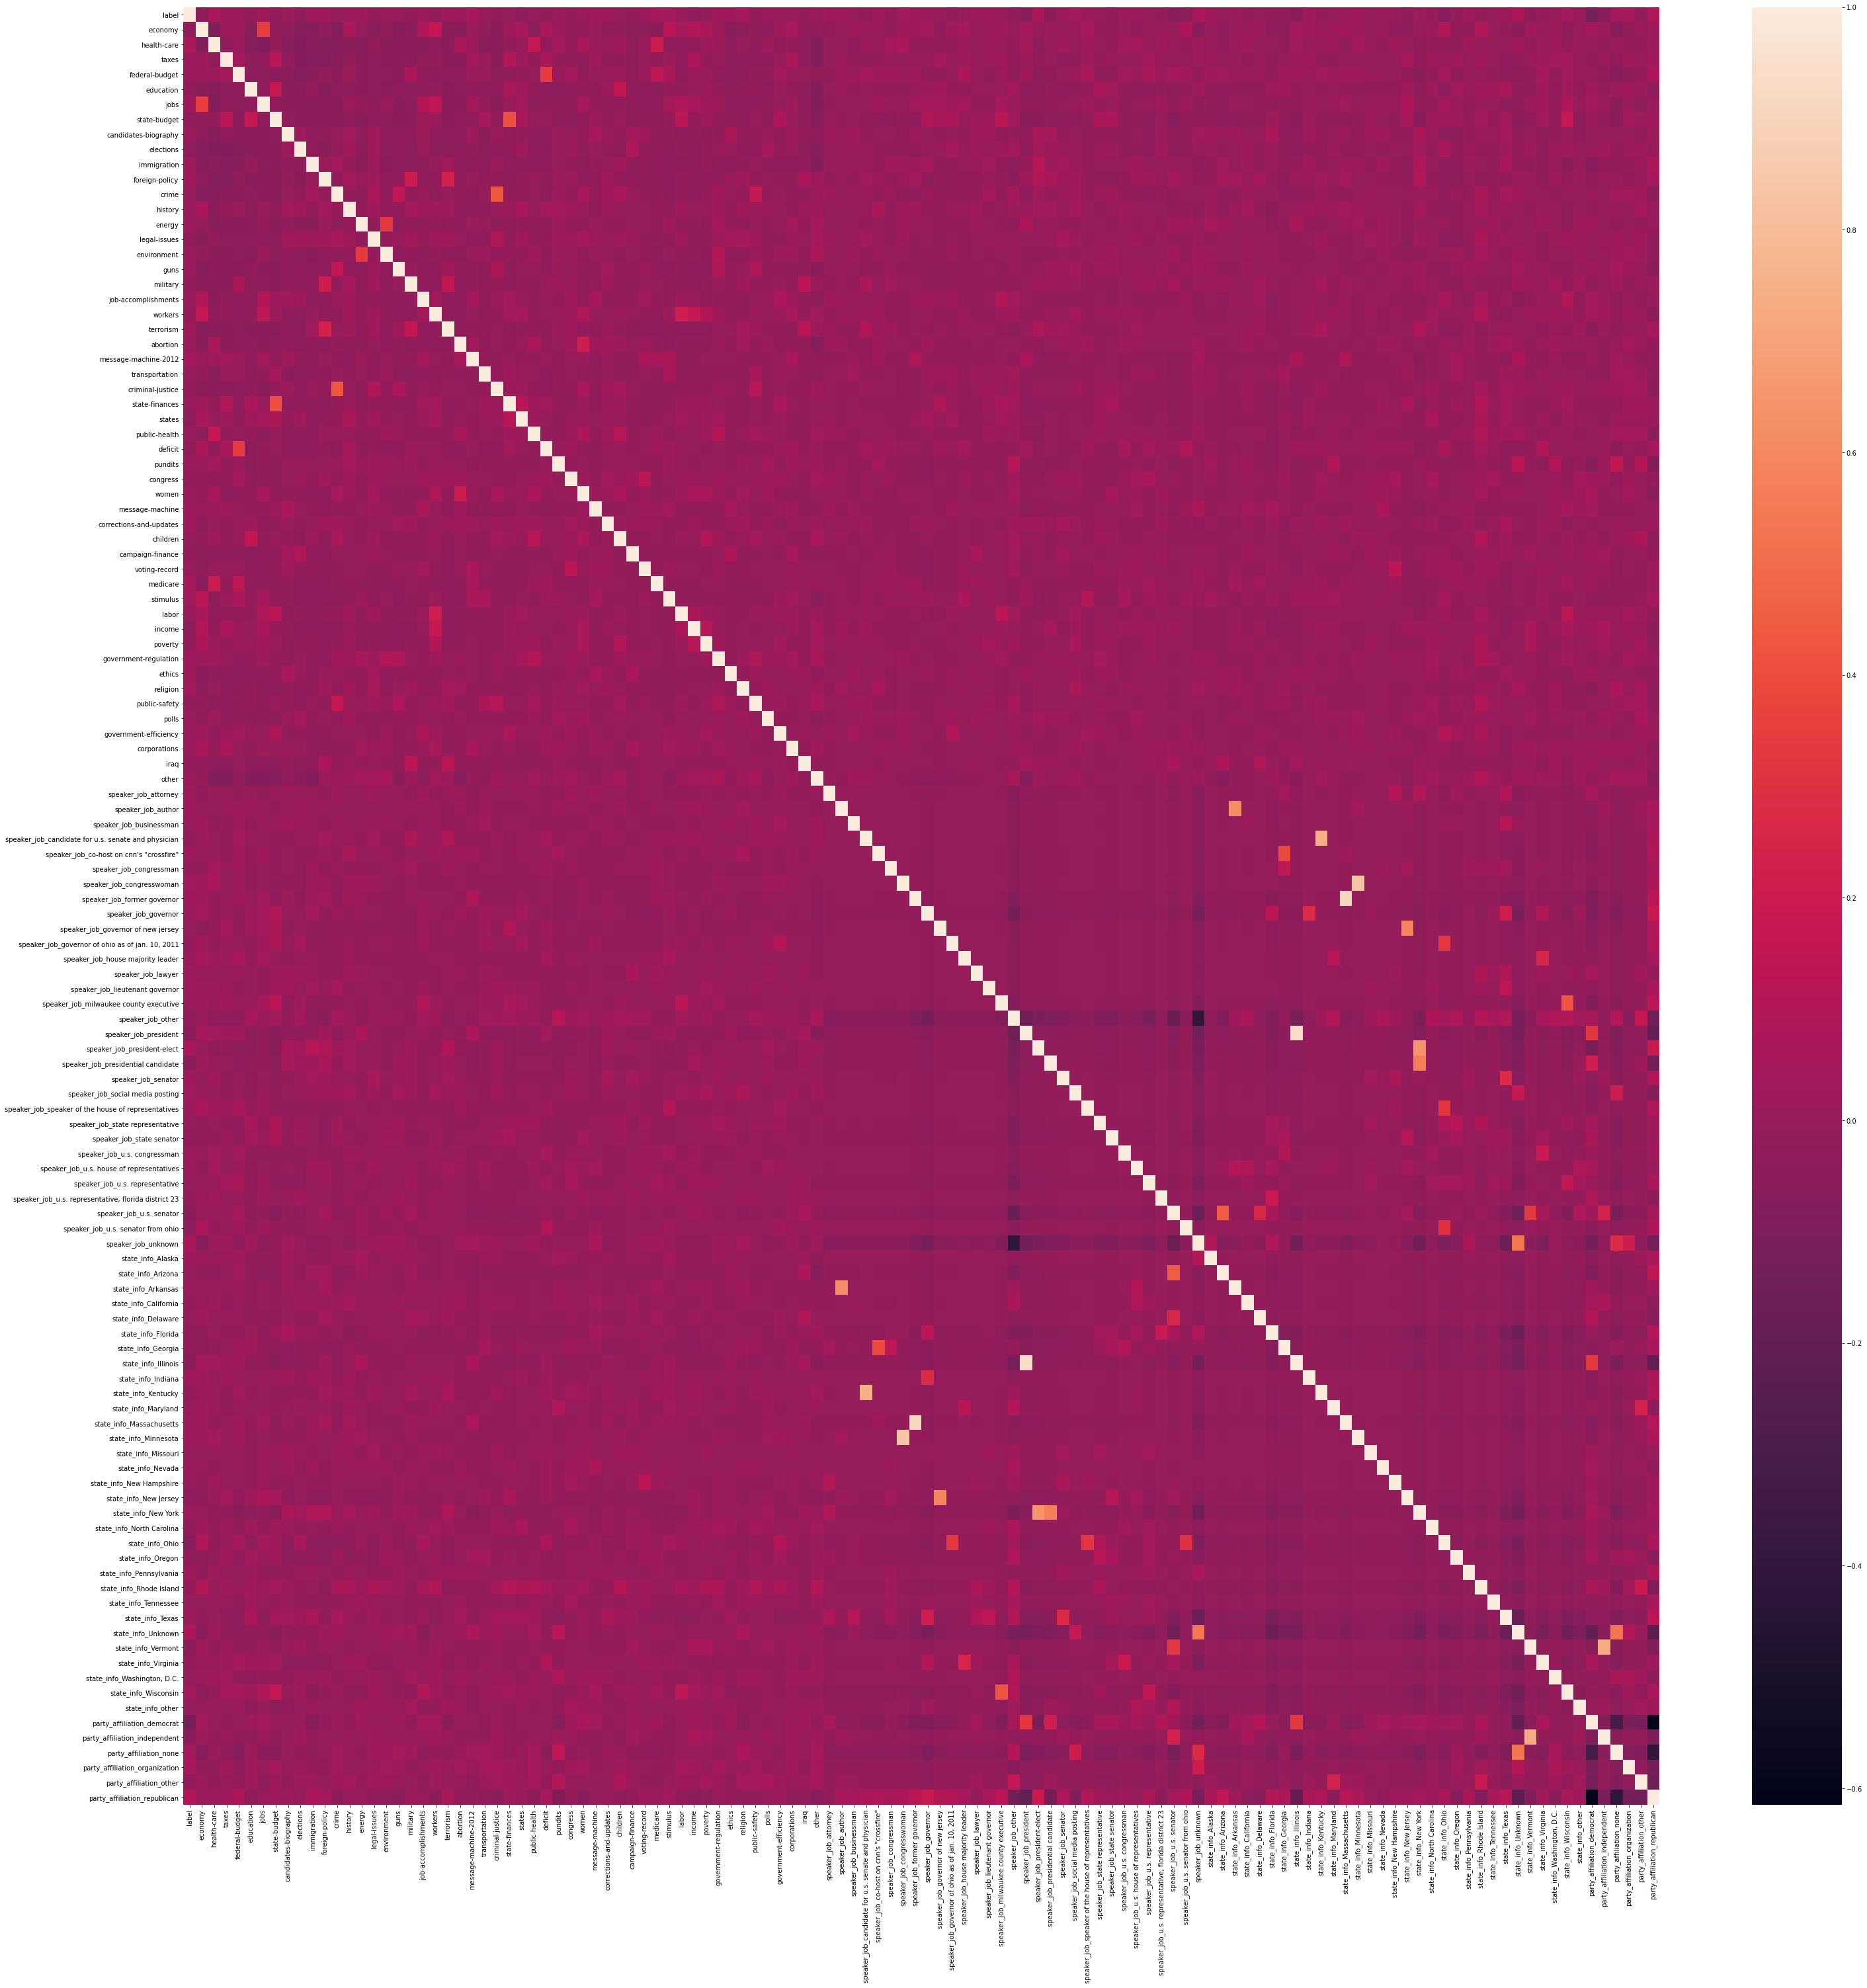

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,50))
sns.heatmap(train.corr())
plt.show()

In [128]:
train.to_csv('preprocessed.csv', index=False)

In [129]:
topic_cols

['economy',
 'health-care',
 'taxes',
 'federal-budget',
 'education',
 'jobs',
 'state-budget',
 'candidates-biography',
 'elections',
 'immigration',
 'foreign-policy',
 'crime',
 'history',
 'energy',
 'legal-issues',
 'environment',
 'guns',
 'military',
 'job-accomplishments',
 'workers',
 'terrorism',
 'abortion',
 'message-machine-2012',
 'transportation',
 'criminal-justice',
 'state-finances',
 'states',
 'public-health',
 'deficit',
 'pundits',
 'congress',
 'women',
 'message-machine',
 'corrections-and-updates',
 'children',
 'campaign-finance',
 'voting-record',
 'medicare',
 'stimulus',
 'labor',
 'income',
 'poverty',
 'government-regulation',
 'ethics',
 'religion',
 'public-safety',
 'polls',
 'government-efficiency',
 'corporations',
 'iraq',
 'other']

In [55]:
speaker_jobs

['other',
 'unknown',
 'u.s. senator',
 'president',
 'governor',
 'president-elect',
 'u.s. representative',
 'presidential candidate',
 'state senator',
 'state representative',
 'former governor',
 'senator',
 'milwaukee county executive',
 'attorney',
 'u.s. house of representatives',
 'social media posting',
 'governor of new jersey',
 'congressman',
 'co-host on cnn\'s "crossfire"',
 'u.s. congressman',
 'congresswoman',
 'speaker of the house of representatives',
 'governor of ohio as of jan. 10, 2011',
 'businessman',
 'author',
 'lawyer',
 'candidate for u.s. senate and physician',
 'u.s. senator from ohio',
 'lieutenant governor',
 'house majority leader']

In [23]:
states

['Unknown',
 'Texas',
 'Florida',
 'Wisconsin',
 'New York',
 'Illinois',
 'Ohio',
 'Georgia',
 'Virginia',
 'Rhode Island',
 'other',
 'Oregon',
 'New Jersey',
 'Massachusetts',
 'Arizona',
 'California',
 'Washington, D.C.',
 'Vermont',
 'New Hampshire',
 'Pennsylvania',
 'Arkansas',
 'Kentucky',
 'Delaware',
 'Tennessee',
 'Maryland',
 'Minnesota',
 'North Carolina',
 'Alaska',
 'Nevada',
 'Indiana',
 'Missouri']

In [25]:
pa

['republican', 'democrat', 'none', 'other', 'organization', 'independent']

In [33]:
test_df = pd.read_csv('test_nolabel.csv')

test_df.head()

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation
0,dc32e5ffa8b,Five members of [the Common Cause Georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,NaN,NaN,democrat
1,aa49bb41cab,Theres no negative advertising in my campaign ...,elections,bill-mccollum,NaN,Florida,republican
2,dddc8d12ac1,Leticia Van de Putte voted to give illegal imm...,"health-care,immigration,public-health",dan-patrick,Lieutenant governor-elect,Texas,republican
3,bcfe8f51667,Fiorinas plan would mean slashing Social Secur...,"federal-budget,medicare,social-security",barbara-boxer,U.S. Senator,California,democrat
4,eedbbaff5ab,"By the end of his first term, President Obama ...","federal-budget,new-hampshire-2012",mitt-romney,Former governor,Massachusetts,republican


In [34]:
values = {}
for t in topic_cols:
    values[t] = 0

test_df = pd.concat([test_df, pd.DataFrame(columns=topic_cols)]).fillna(value=values)

test_df = test_df.apply(convert_topics_to_dummies, axis=1)
test_df.head()

,id,statement,subject,speaker,speaker_job,state_info,party_affiliation,economy,health-care,taxes,...,poverty,government-regulation,ethics,religion,public-safety,polls,government-efficiency,corporations,iraq,other
0,dc32e5ffa8b,Five members of [the Common Cause Georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,NaN,NaN,democrat,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,aa49bb41cab,Theres no negative advertising in my campaign ...,elections,bill-mccollum,NaN,Florida,republican,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,dddc8d12ac1,Leticia Van de Putte voted to give illegal imm...,"health-care,immigration,public-health",dan-patrick,Lieutenant governor-elect,Texas,republican,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,bcfe8f51667,Fiorinas plan would mean slashing Social Secur...,"federal-budget,medicare,social-security",barbara-boxer,U.S. Senator,California,democrat,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,eedbbaff5ab,"By the end of his first term, President Obama ...","federal-budget,new-hampshire-2012",mitt-romney,Former governor,Massachusetts,republican,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
test_df.speaker_job.fillna(value='Unknown', inplace=True)

test_df['speaker_job']=test_df.speaker_job.apply(lambda x: x.lower())

# top_speaker_jobs = train.speaker_job.value_counts().head(30).index.to_list()

test_df['speaker_job'] = test_df.speaker_job.apply(lambda x: x if x in top_speaker_jobs else 'other')

In [36]:
test_df.speaker_job.value_counts()

other                                       1085
unknown                                     1083
u.s. senator                                 296
president                                    177
governor                                     169
u.s. representative                          110
presidential candidate                        99
president-elect                               96
state representative                          71
state senator                                 70
former governor                               70
senator                                       65
milwaukee county executive                    60
congressman                                   41
u.s. house of representatives                 37
attorney                                      34
governor of new jersey                        30
u.s. congressman                              26
social media posting                          25
speaker of the house of representatives       23
lawyer              

In [37]:
test_df = pd.get_dummies(test_df, columns=['speaker_job'])
test_df.head()

,id,statement,subject,speaker,state_info,party_affiliation,economy,health-care,taxes,federal-budget,...,speaker_job_speaker of the house of representatives,speaker_job_state representative,speaker_job_state senator,speaker_job_u.s. congressman,speaker_job_u.s. house of representatives,speaker_job_u.s. representative,"speaker_job_u.s. representative, florida district 23",speaker_job_u.s. senator,speaker_job_u.s. senator from ohio,speaker_job_unknown
0,dc32e5ffa8b,Five members of [the Common Cause Georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,NaN,democrat,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,aa49bb41cab,Theres no negative advertising in my campaign ...,elections,bill-mccollum,Florida,republican,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,dddc8d12ac1,Leticia Van de Putte voted to give illegal imm...,"health-care,immigration,public-health",dan-patrick,Texas,republican,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,bcfe8f51667,Fiorinas plan would mean slashing Social Secur...,"federal-budget,medicare,social-security",barbara-boxer,California,democrat,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,eedbbaff5ab,"By the end of his first term, President Obama ...","federal-budget,new-hampshire-2012",mitt-romney,Massachusetts,republican,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
test_df.state_info.fillna(value='Unknown', inplace=True)

# top_states = train.state_info.value_counts().head(30).index.to_list()

test_df['state_info'] = test_df.state_info.apply(lambda x: x if x in top_states else 'other')

# states = train.state_info.value_counts().index.tolist()

test_df = pd.get_dummies(test_df, columns=['state_info'])
test_df.head()


,id,statement,subject,speaker,party_affiliation,economy,health-care,taxes,federal-budget,education,...,state_info_Pennsylvania,state_info_Rhode Island,state_info_Tennessee,state_info_Texas,state_info_Unknown,state_info_Vermont,state_info_Virginia,"state_info_Washington, D.C.",state_info_Wisconsin,state_info_other
0,dc32e5ffa8b,Five members of [the Common Cause Georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,democrat,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,aa49bb41cab,Theres no negative advertising in my campaign ...,elections,bill-mccollum,republican,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,dddc8d12ac1,Leticia Van de Putte voted to give illegal imm...,"health-care,immigration,public-health",dan-patrick,republican,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,bcfe8f51667,Fiorinas plan would mean slashing Social Secur...,"federal-budget,medicare,social-security",barbara-boxer,democrat,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,eedbbaff5ab,"By the end of his first term, President Obama ...","federal-budget,new-hampshire-2012",mitt-romney,republican,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# top_parties = train.party_affiliation.value_counts().head(5).index.to_list()

test_df['party_affiliation'] = test_df.party_affiliation.apply(lambda x: x if x in top_parties else 'other')

test_df = pd.get_dummies(test_df, columns=['party_affiliation'])
test_df.head()

,id,statement,subject,speaker,economy,health-care,taxes,federal-budget,education,jobs,...,state_info_Virginia,"state_info_Washington, D.C.",state_info_Wisconsin,state_info_other,party_affiliation_democrat,party_affiliation_independent,party_affiliation_none,party_affiliation_organization,party_affiliation_other,party_affiliation_republican
0,dc32e5ffa8b,Five members of [the Common Cause Georgia] boa...,"campaign-finance,ethics,government-regulation",kasim-reed,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,aa49bb41cab,Theres no negative advertising in my campaign ...,elections,bill-mccollum,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,dddc8d12ac1,Leticia Van de Putte voted to give illegal imm...,"health-care,immigration,public-health",dan-patrick,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,bcfe8f51667,Fiorinas plan would mean slashing Social Secur...,"federal-budget,medicare,social-security",barbara-boxer,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,eedbbaff5ab,"By the end of his first term, President Obama ...","federal-budget,new-hampshire-2012",mitt-romney,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
test_df.to_csv('test_preprocessed.csv',index=False)